# Boston Dataset

In [ ]:
# Libraries Data Description / Preparation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import warnings
import json
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Loading necessary Files <- your file path here
df = pd.read_csv("C:/Users/Nishant Moona/Downloads/boston.csv")

In [4]:
#Displaying top 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Checking Duplicate Entries
df.duplicated().any()

False

In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#Checking the missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
#descriptive statistics summarize the central tendency, dispersion, and shape of a dataset distribution
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
corr_matrix = df.corr()

<AxesSubplot:>

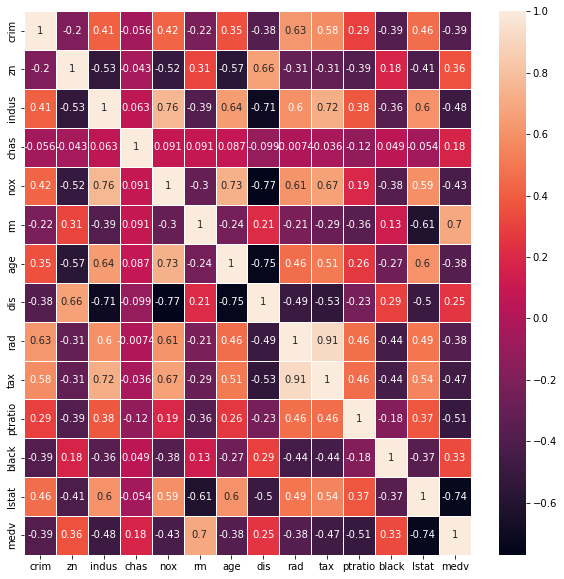

In [16]:
#Creating the Correlation Matrix
plt.figure (figsize = (10, 10))
sns.heatmap (data = df.corr(), annot = True, linewidths=0.5)

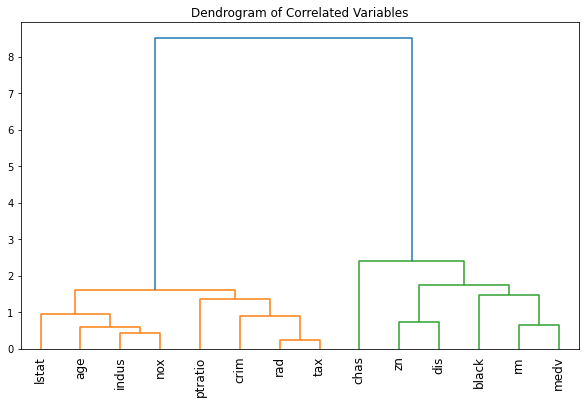

In [17]:
Z = linkage(corr_matrix, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=corr_matrix.columns, leaf_rotation=90)
plt.title('Dendrogram of Correlated Variables')
plt.show()

# Linear Regression

In [18]:
# 1. Linear Regression
# This is our cleaned dataset and "crim" is the target variable
X = df.drop(columns=['crim']) # Target
y = df['crim'] # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Linear regression assumes that the features are on a comparable scale.
# Standardizing the features can improve the performance and convergence of the model.

# Fit the model using scikit-learn
model = LinearRegression()

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
mean_cv_mse = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mean_cv_mse)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Use statsmodels library to calculate p-values
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Mean Cross-Validation MSE: 39.06568353199522
Training Mean Squared Error: 35.88138733484208
Test Mean Squared Error: 61.40060840084915
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     25.23
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.24e-44
Time:                        12:57:02   Log-Likelihood:                -1296.5
No. Observations:                 404   AIC:                             2621.
Df Residuals:                     390   BIC:                             2677.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

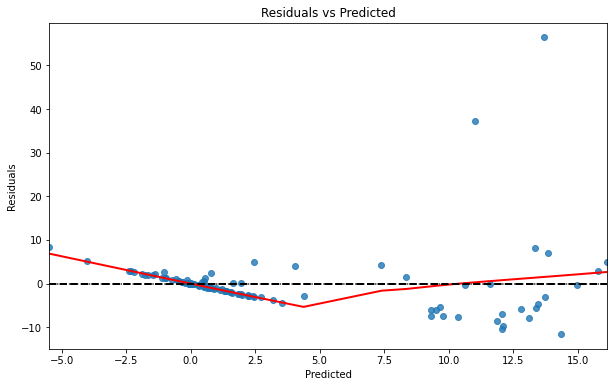

In [19]:
# Residual analysis for Linear Regression
residuals = y_test - y_test_pred

#Plotting the Graph
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()
#Analyze the residuals for patterns that indicate issues with the model such as non-linearity, heteroscedasticity.

         Coefficient
rad         4.937315
lstat       1.438989
zn          0.926386
rm          0.823918
black       0.093416
chas       -0.233488
age        -0.417999
indus      -0.425525
ptratio    -0.616337
tax        -0.628238
nox        -0.937922
dis        -1.981349
medv       -2.046234


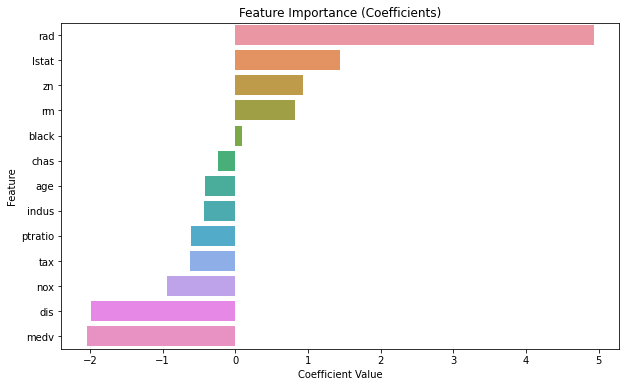

In [21]:
# Feature importance for Linear Regression
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)
#interpreting the importance of features

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients)')
plt.show()

# Lasso Regularisation

In [23]:
# 2. Lasso Regularization
# This is our cleaned dataframe and "crim is the target variable
X = df.drop(columns=['crim'])
y = df['crim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
mean_cv_mse = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mean_cv_mse)

# Fit the LassoCV model
lasso_cv = LassoCV(cv=5, random_state=0)
lasso_cv.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Print the best alpha
print("Best alpha:", lasso_cv.alpha_)

# Get coefficients and p-values using statsmodels library 
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Mean Cross-Validation MSE: 39.06568353199522
Training Mean Squared Error: 35.888948331154005
Test Mean Squared Error: 61.18678198560104
Best alpha: 0.010220250518891603
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     25.23
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.24e-44
Time:                        12:59:43   Log-Likelihood:                -1296.5
No. Observations:                 404   AIC:                             2621.
Df Residuals:                     390   BIC:                             2677.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

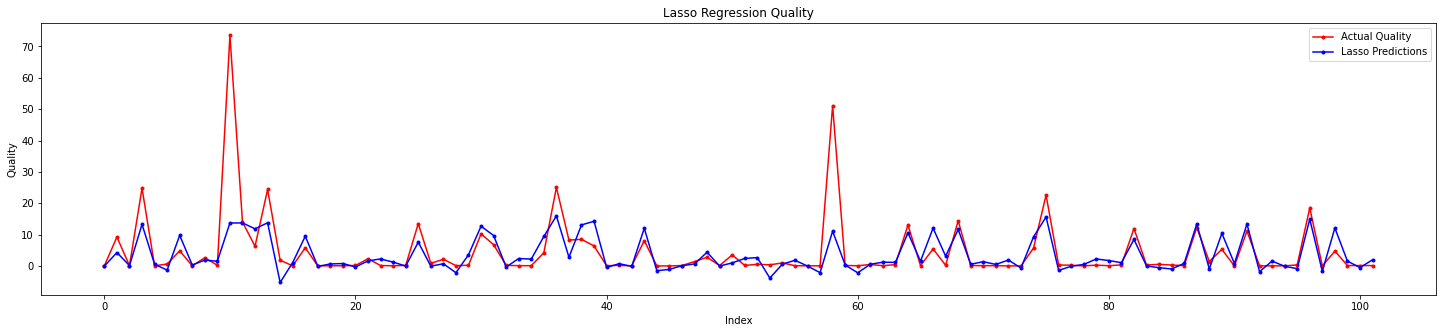

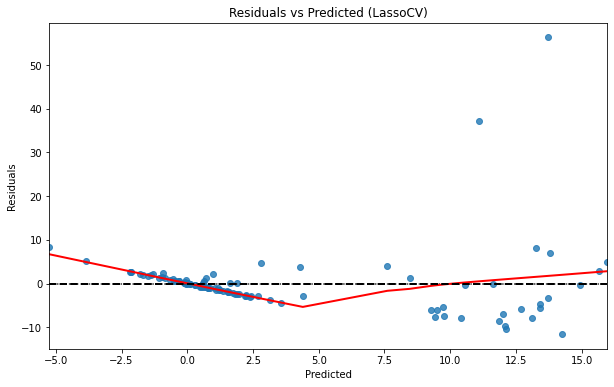

In [24]:
# Preparing the data for plotting
plot_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality (Lasso)': y_test_pred
})

# Resetting the index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting the results
plt.figure(figsize=(25, 5))
plt.title("Lasso Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (Lasso)"], color="blue", marker=".", label="Lasso Predictions")
plt.legend()
plt.show()

# Residual analysis for LassoCV
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (LassoCV)')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

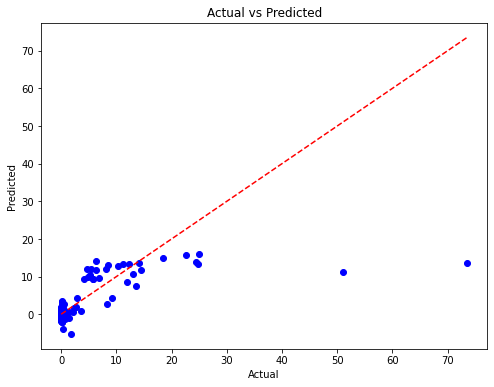

In [25]:
# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Ridge Regularization

In [26]:
# 3. Ridge Regularisation
# This is our cleaned dataframe and "crim" is the target variable""
X = df.drop(columns=['crim']) # Target
y = df['crim'] # Features

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error') # 5-fold cross-validation
mean_cv_mse = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mean_cv_mse)

# Fit the RidgeCV model
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_train_pred = ridge_cv.predict(X_train_scaled)
y_test_pred = ridge_cv.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Printing the best alpha
print("Best alpha:", ridge_cv.alpha_)

# Get coefficients and p-values using statsmodels (optional)
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Mean Cross-Validation MSE: 39.06568353199522
Training Mean Squared Error: 35.99102549635226
Test Mean Squared Error: 61.34059358735853
Best alpha: 10.0
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     25.23
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.24e-44
Time:                        13:01:38   Log-Likelihood:                -1296.5
No. Observations:                 404   AIC:                             2621.
Df Residuals:                     390   BIC:                             2677.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

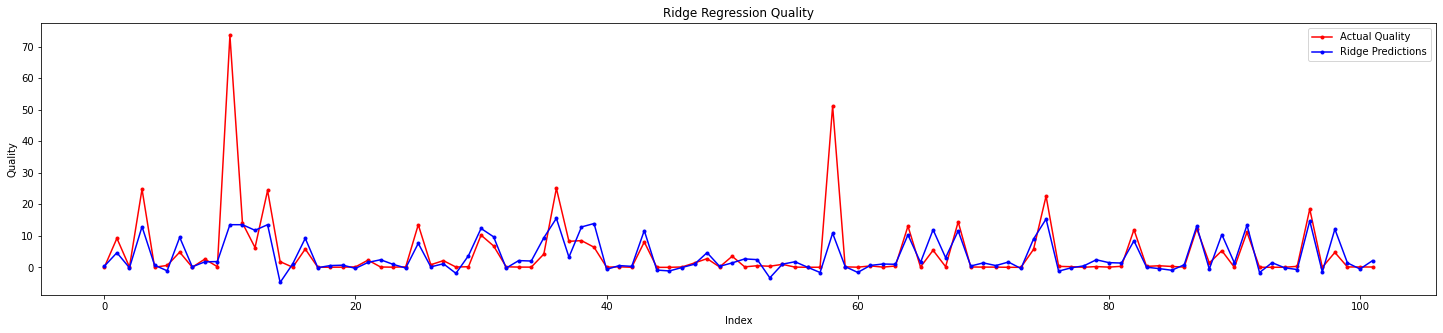

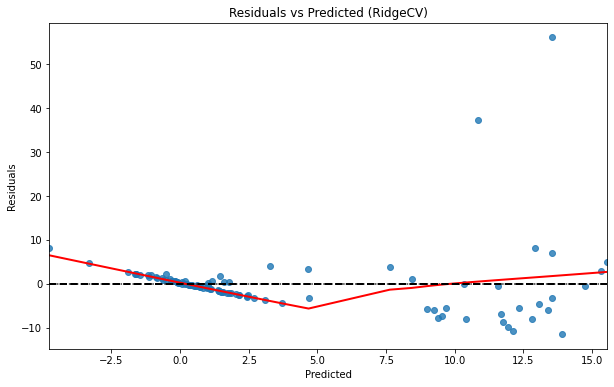

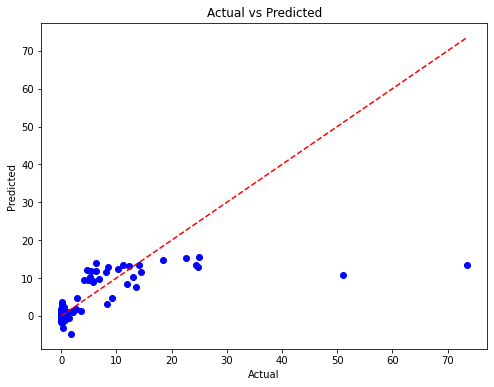

In [27]:
# Prepare the data for plotting
plot_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality (Ridge)': y_test_pred
})

# Reset index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting the results
plt.figure(figsize=(25, 5))
plt.title("Ridge Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (Ridge)"], color="blue", marker=".", label="Ridge Predictions")
plt.legend()
plt.show()

# Residual analysis for RidgeCV
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (RidgeCV)')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Elastic Net for regularization

In [28]:
# 4. Elastic Net CV
X = df.drop(columns=['crim']) # Target
y = df['crim'] # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the ElasticNetCV model
elasticnet_cv = ElasticNetCV(cv=5, random_state=0)
elasticnet_cv.fit(X_train_scaled, y_train)

# Predict on the test and training data
y_train_pred = elasticnet_cv.predict(X_train_scaled)
y_test_pred = elasticnet_cv.predict(X_test_scaled)

# Calculate Mean Squared Error for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

# Print the best alpha (regularization strength) and l1_ratio
print("Best alpha:", elasticnet_cv.alpha_)
print("Best l1_ratio:", elasticnet_cv.l1_ratio_)

# Get coefficients and p-values using statsmodels (optional)
X_train_scaled_const = sm.add_constant(X_train_scaled)  # Adding a constant
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary to see p-values
print(ols_model.summary())

Training Mean Squared Error: 36.007416022630146
Test Mean Squared Error: 61.15990868137019
Best alpha: 0.0357203560739127
Best l1_ratio: 0.5
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     25.23
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           4.24e-44
Time:                        13:02:32   Log-Likelihood:                -1296.5
No. Observations:                 404   AIC:                             2621.
Df Residuals:                     390   BIC:                             2677.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

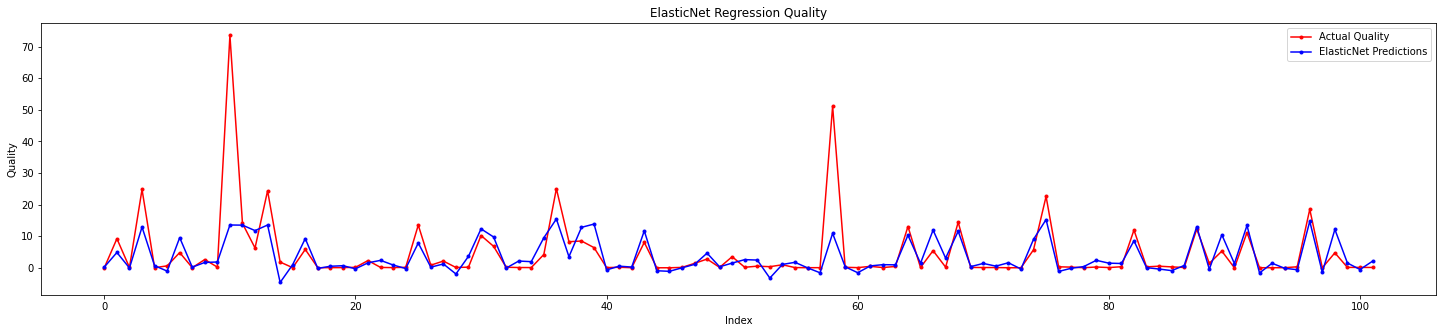

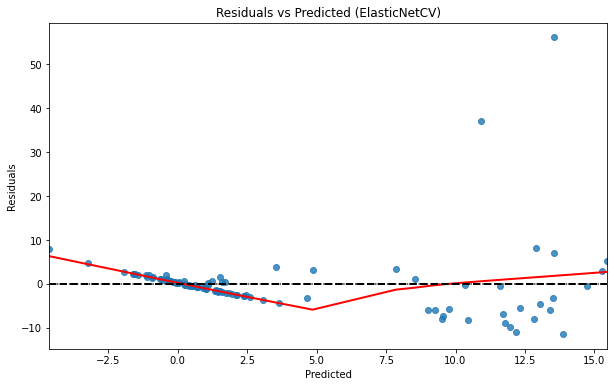

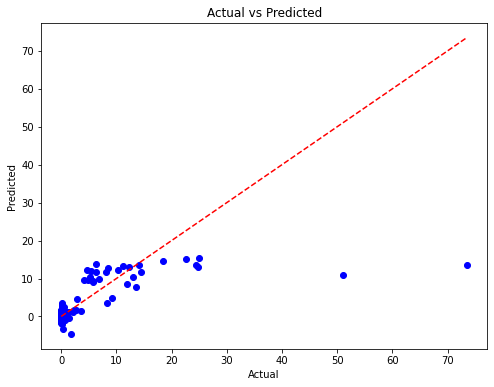

In [29]:
# Prepare the data for plotting
plot_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality (ElasticNet)': y_test_pred
})

# Reset index to align with the concatenated data
plot_df.reset_index(drop=True, inplace=True)

# Plotting the results
plt.figure(figsize=(25, 5))
plt.title("ElasticNet Regression Quality")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.plot(plot_df.index, plot_df["Actual Quality"], color="red", marker=".", label="Actual Quality")
plt.plot(plot_df.index, plot_df["Predicted Quality (ElasticNet)"], color="blue", marker=".", label="ElasticNet Predictions")
plt.legend()
plt.show()

# Residual analysis for ElasticNetCV
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (ElasticNetCV)')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.show()

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# SVC Classifier

In [34]:
# 5. SVC Classifier
# Create a binary classification target based on the median crime rate
median_crim = df['crim'].median()
df['high_crime'] = (df['crim'] > median_crim).astype(int) # High-crime rate is categorised as if it is greater than median value.
#  The median is robust to outliers and represents the middle value of the dataset.

# Define features and target variable
X = df.drop(columns=['crim', 'high_crime'])
y = df['high_crime']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the SVC model
svc_model = SVC(kernel='linear', probability=True, random_state=0)
svc_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = svc_model.predict(X_test_scaled)
y_test_prob = svc_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[48  3]
 [ 8 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        51
           1       0.93      0.84      0.89        51

    accuracy                           0.89       102
   macro avg       0.90      0.89      0.89       102
weighted avg       0.90      0.89      0.89       102


Accuracy Score: 0.8921568627450981


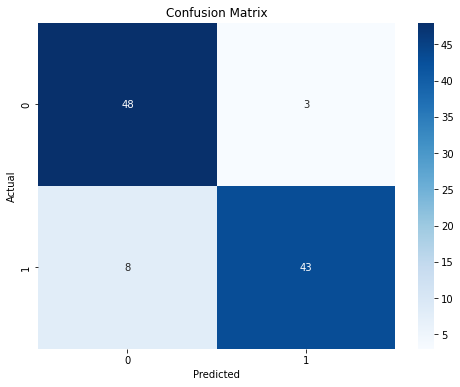

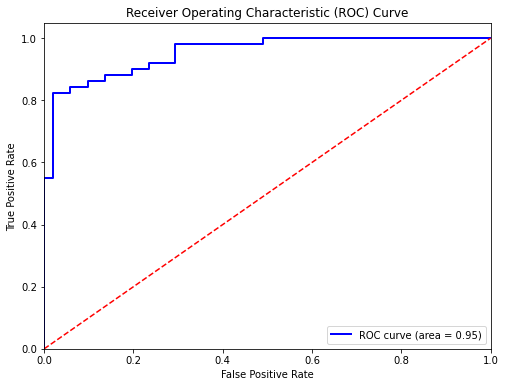

In [35]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

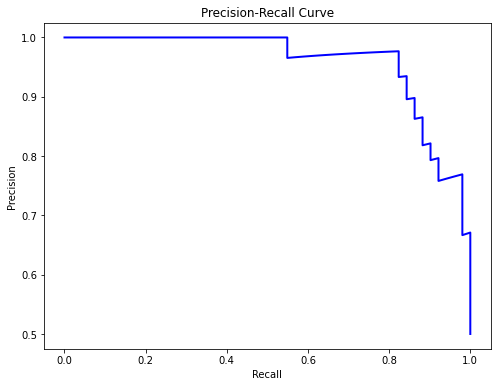

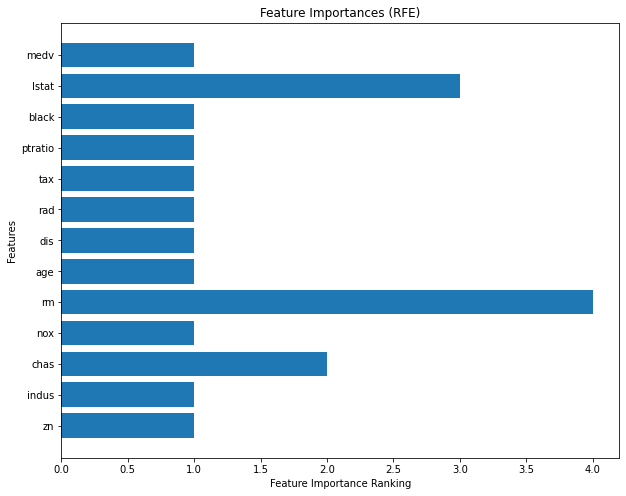

In [38]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance using Recursive Feature Elimination (RFE)
rfe = RFE(svc_model, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X_train_scaled, y_train)

# Plotting feature importances
ranking = rfe.ranking_
features = X.columns

plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(features)), ranking, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance Ranking')
plt.ylabel('Features')
plt.title('Feature Importances (RFE)')
plt.show()

In [42]:
# 6. Multi Layer Perceptron for Classification
# Create a binary classification target based on the median crime rate
median_crim = df['crim'].median() 
df['high_crime'] = (df['crim'] > median_crim).astype(int) # High-crime rate is categorised as if it is greater than median value.
#  The median is robust to outliers and represents the middle value of the dataset.

# Define features and target variable
X = df.drop(columns=['crim', 'high_crime'])
y = df['high_crime']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Classifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = mlp_classifier.predict(X_test_scaled)
y_test_prob = mlp_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
[[47  4]
 [ 7 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.92      0.86      0.89        51

    accuracy                           0.89       102
   macro avg       0.89      0.89      0.89       102
weighted avg       0.89      0.89      0.89       102


Accuracy Score: 0.8921568627450981


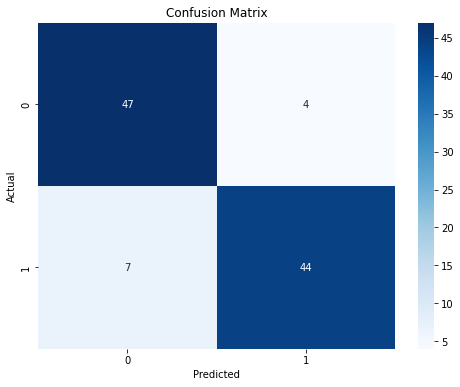

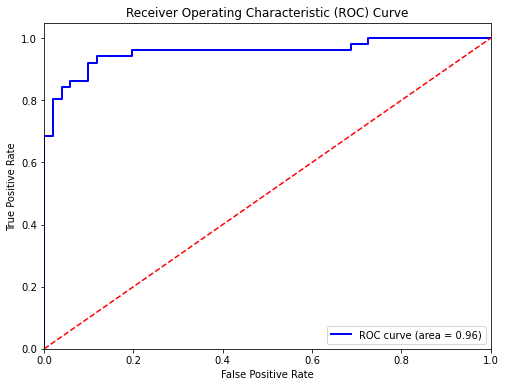

In [43]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

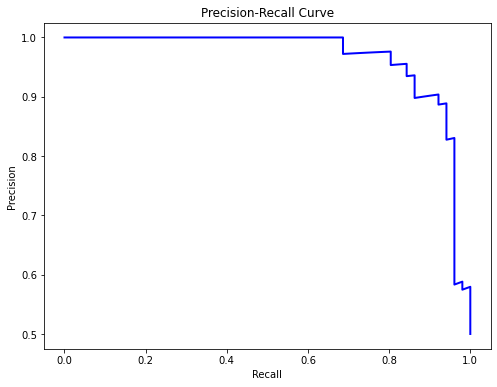

In [44]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()